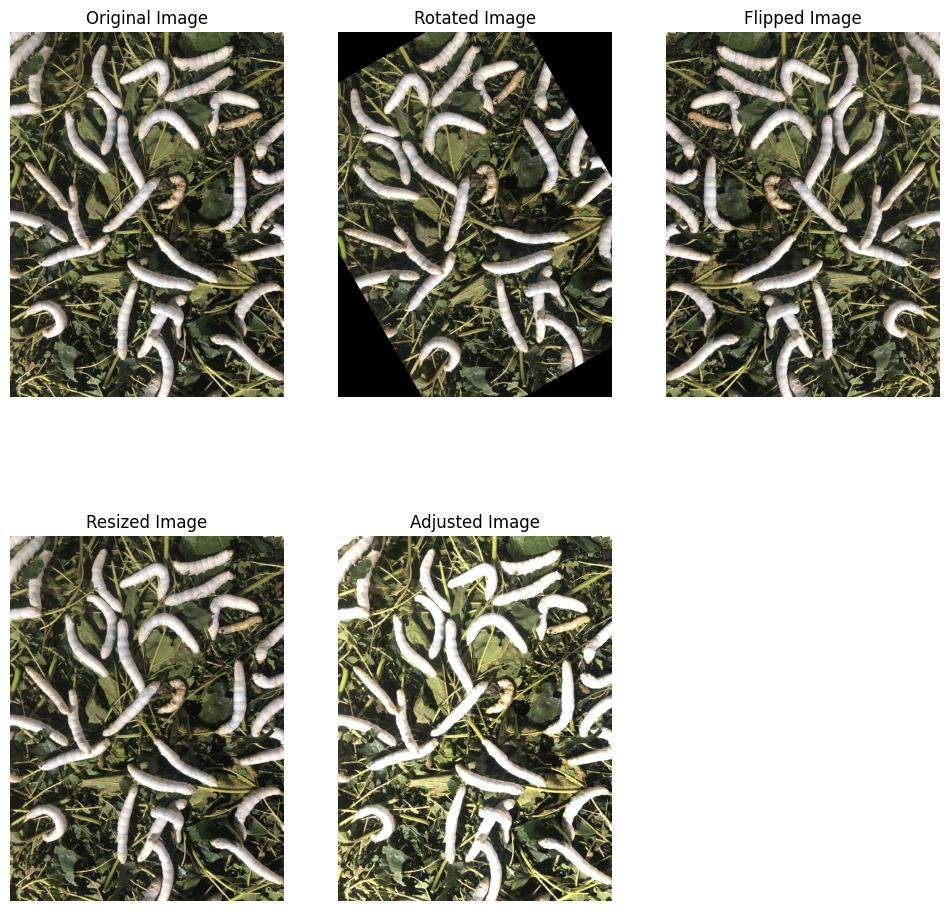

In [30]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load ảnh đầu vào
image_path = 'data.jpg'
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Chuyển đổi sang định dạng RGB

# Xoay ảnh
angle = 30
rows, cols, _ = image.shape
rotation_matrix = cv2.getRotationMatrix2D((cols / 2, rows / 2), angle, 1)
rotated_image = cv2.warpAffine(image, rotation_matrix, (cols, rows))

# Lật ảnh
flipped_image = cv2.flip(image, 1)  # Lật theo chiều ngang (1) hoặc chiều dọc (0)

# Thu phóng và cắt ảnh
scale_percent = 120  # Phần trăm thu phóng
width = int(image.shape[1] * scale_percent / 100)
height = int(image.shape[0] * scale_percent / 100)
dim = (width, height)
resized_image = cv2.resize(image, dim, interpolation=cv2.INTER_AREA)

# Thay đổi độ sáng và tương phản
brightness = 50
contrast = 50
adjusted_image = np.int16(image)
adjusted_image = adjusted_image * (contrast / 127 + 1) - contrast + brightness
adjusted_image = np.clip(adjusted_image, 0, 255)
adjusted_image = np.uint8(adjusted_image)

# Hiển thị các ảnh đã xử lý
plt.figure(figsize=(12, 12))

plt.subplot(2, 3, 1)
plt.title('Ảnh gốc')
plt.imshow(image)
plt.axis('off')

plt.subplot(2, 3, 2)
plt.title('Xoay ảnh')
plt.imshow(rotated_image)
plt.axis('off')

plt.subplot(2, 3, 3)
plt.title('Flipped Image')
plt.imshow(flipped_image)
plt.axis('off')

plt.subplot(2, 3, 4)
plt.title('Resized Image')
plt.imshow(resized_image)
plt.axis('off')

plt.subplot(2, 3, 5)
plt.title('Adjusted Image')
plt.imshow(adjusted_image)
plt.axis('off')

plt.show()


(-0.5, 1535.5, 2047.5, -0.5)

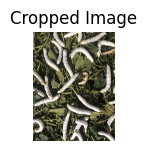

In [31]:

# Cắt ảnh (Crop)
start_row, start_col = int(rows * 0.1), int(cols * 0.1)
end_row, end_col = int(rows * 0.9), int(cols * 0.9)
cropped_image = image[start_row:end_row, start_col:end_col]
plt.subplot(3, 3, 6)
plt.title('Cropped Image')
plt.imshow(cropped_image)
plt.axis('off')


In [47]:

cv2.imwrite(os.path.join(output_dir, 'adjusted_image.jpg'), cv2.cvtColor(adjusted_image, cv2.COLOR_RGB2BGR))


True

(-0.5, 1499.5, 1499.5, -0.5)

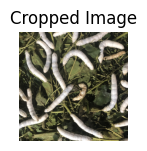

In [45]:
from PIL import Image
def crop_image(input_image, crop_area):
    # Load image
    img = Image.open(input_image)
    
    # Crop image
    cropped_img = img.crop(crop_area)
    return cropped_img
input_image = 'data.jpg'
output_image = 'cropped_image.jpg'
# Define crop area (left, upper, right, lower)
crop_area = (300, 300, 1800, 1800)  # Example: cropping a 300x300 region starting at (100, 100)

ima = crop_image(input_image, crop_area)
plt.subplot(3, 3, 6)
plt.title('Cropped Image')
plt.imshow(ima)
plt.axis('off')


In [46]:
cv2.imwrite(os.path.join(output_dir, 'Cropped.jpg'), cv2.cvtColor(flipped_image, cv2.COLOR_RGB2BGR))


True

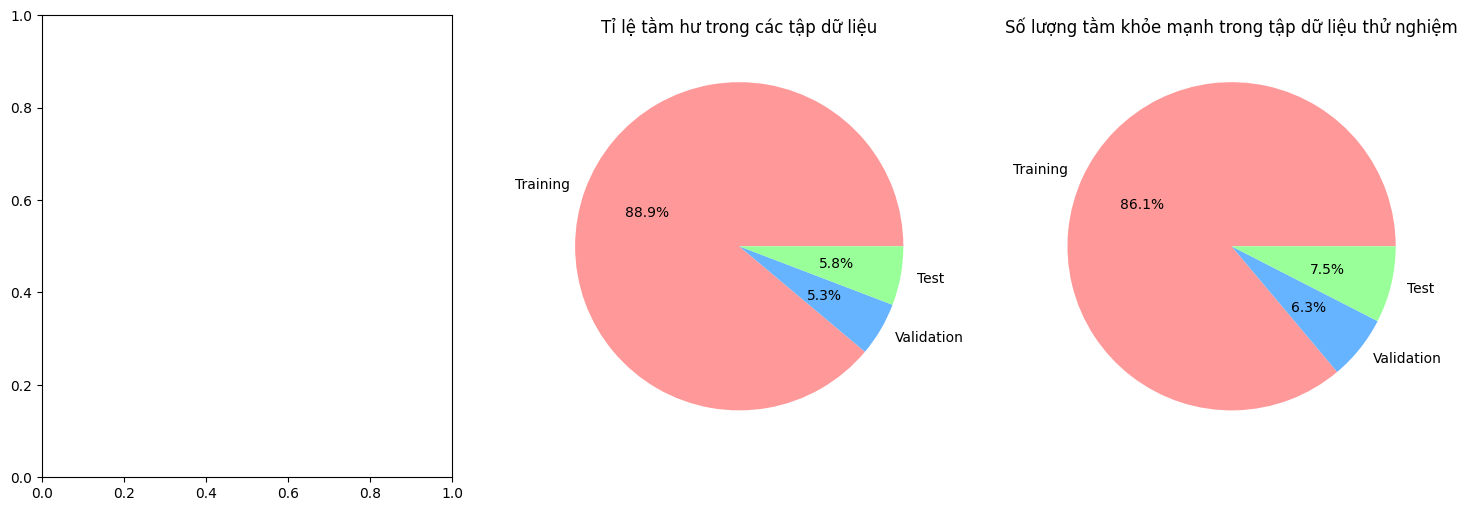

In [29]:
import matplotlib.pyplot as plt

# Data
data_total_images = [3118, 644, 805]
data_healthy_silkworms = [72000, 5300, 6300]
data_diseased_silkworms = [10400, 621, 679]

labels = ['Training', 'Validation', 'Test']
colors = ['#ff9999','#66b3ff','#99ff99']

# Create subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))


# Healthy silkworms
ax2.pie(data_diseased_silkworms, labels=labels, autopct='%1.1f%%', colors=colors)
ax2.set_title('Tỉ lệ tằm hư trong các tập dữ liệu')

# Diseased silkworms
ax3.pie(data_healthy_silkworms, labels=labels, autopct='%1.1f%%', colors=colors)
ax3.set_title('Số lượng tằm khỏe mạnh trong tập dữ liệu thử nghiệm')


# Show plot
plt.show()


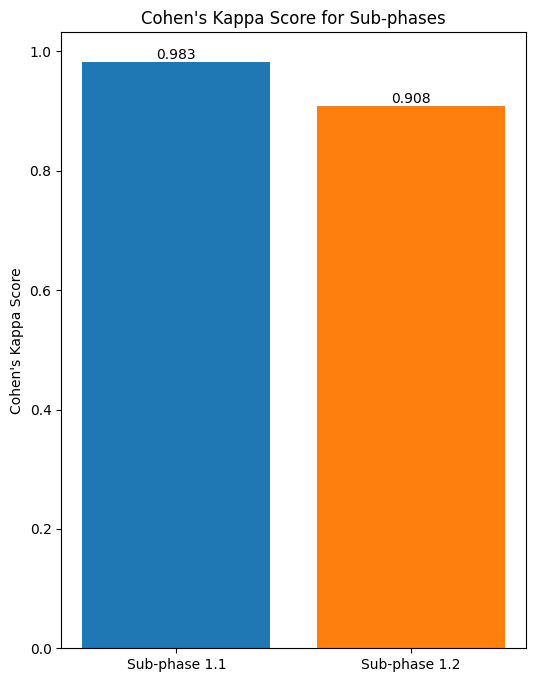

In [8]:
import matplotlib.pyplot as plt

# Data
sub_phases = ['Sub-phase 1.1', 'Sub-phase 1.2']
colors = ['#1f77b4', '#ff7f0e']

# Create bar plot
plt.figure(figsize=(6, 8))
bars = plt.bar(sub_phases, scores, color=colors)

# Add text on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 3), va='bottom', ha='center')

# Add labels and title
plt.ylabel("Cohen's Kappa Score")
plt.title("Cohen's Kappa Score for Sub-phases")

# Show plot
plt.show()
